<a href="https://colab.research.google.com/github/PinakDivecha/1101608_Assignment2/blob/master/Keras_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required Library
import tensorflow.compat.v1 as tf
import pandas as pd
# Get the train/test split package from sklearn for preparing our dataset to # train and test the model with 
from sklearn.model_selection import train_test_split
# Import the numpy library to work with and manipulate the data 
# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split
import numpy as np
# Imported the Seaborn for displaying the graph
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Imported the necessary libraries
import csv
import urllib.request as urllib2
import matplotlib.pyplot as plt

import pandas as pd
# Importing data using url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

# reading data using pandas and converting into dataframe
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df = df.sample(frac=1).reset_index(drop=True)
print(len(df))
df.head()

156060


,PhraseId,SentenceId,Phrase,Sentiment
0,2098,80,its predecessors proud,3
1,43335,2094,"and , through it all , human",3
2,24229,1101,featured in this film,2
3,104618,5524,Murdock,2
4,16342,704,While it is interesting to witness the conflic...,1


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())
for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['concrete', 'story', 'and'], 2]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [7]:
for l in range(len(documents)):                   #For each review document 
  label = documents[l][1]                         #Save review label 
  tmpReview = []                                  #Placeholder list for new review 
  for w in documents[l][0]:                       #For each word this is review 
    newWord = w                                   #Set newWork to be the updated word 
    if remove_stopwords and (w in stopwords_en):  #if the word is a stopword & we want to remove stopwords 
      continue                                    #skip the word and don’t had it to the normalized review 
    if removePuncs and (w in punctuations):       #if the word is a punc. & we want to remove punctuations 
      continue                                    #skip the word and don’t had it to the normalized review 
    if useStemming:
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                     #Add normalized word to the tmp review 
  documents[l] = (tmpReview, label)             #Update the reviews list with clean review 
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('concrete story', 2)


In [8]:
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
df.head()

,text,sentiment
0,concrete story,2
1,retread story bad writing,2
2,'s ` laughing variety ` laughing,1
3,Even hastily amateurishly drawn animation engage,0
4,interesting likable,4


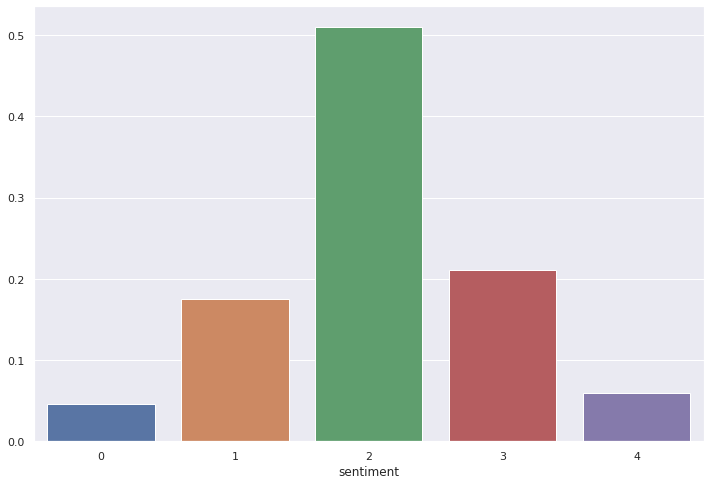

In [9]:
dist = df.groupby(["sentiment"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

In [10]:
dist

sentiment
0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
dtype: float64

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2500)#, # ngram_range=(1, 1)) 
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 


Using TensorFlow backend.


In [0]:
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, Y)

In [0]:
# (unique, counts) = np.unique(y_res, return_counts=True)
# print(unique, counts)

In [0]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_res,  y_res, test_size=0.3, random_state=2003)

In [0]:
# .shape
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test
#
# X_train = X_train.toarray()
# Y_train = Y_train 
# X_test = X_test.toarray()
# Y_test = Y_test

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
batch_size = 64
num_classes = 5
epochs = 15

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [21]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5,
                 activation='relu',
                 input_shape=(2500,1)))
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(rate = 0.5))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              # optimizer=keras.optimizers.(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [23]:
X_train.shape[1]

2500

In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(109242, 2500, 1)

In [25]:

# _, accuracy = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
import timeit

start = timeit.default_timer()
hh = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=35)
stop = timeit.default_timer()
model.save('/content/drive/My Drive/1101608_1dconv_reg.h5')

test_loss, test_accuracy, test_f1_score, test_precision, test_recall = model.evaluate(X_test, Y_test, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/35





109242/109242 [==============================] - 60s 553us/step - loss: 1.1221 - acc: 0.5614 - f1_m: 0.4849 - precision_m: 0.6067 - recall_m: 0.4109
Epoch 2/35
109242/109242 [==============================] - 48s 435us/step - loss: 1.0247 - acc: 0.5990 - f1_m: 0.5571 - precision_m: 0.6604 - recall_m: 0.4834
Epoch 3/35
109242/109242 [==============================] - 48s 435us/step - loss: 0.9995 - acc: 0.6100 - f1_m: 0.5742 - precision_m: 0.6686 - recall_m: 0.5047
Epoch 4/35
109242/109242 [==============================] - 47s 433us/step - loss: 0.9844 - acc: 0.6165 - f1_m: 0.5858 - precision_m: 0.6733 - recall_m: 0.5198
Epoch 5/35
109242/109242 [==============================] - 48s 437us/step - loss: 0.9744 - acc: 0.6213 - f1_m: 0.5919 - precision_m: 0.6753 - recall_m: 0.5281
Epoch 6/35
109242/109242 [==============================] - 47s 434us/step - loss: 0.9652 - acc: 0

In [26]:
print("Before saving")
print('Time: ', stop - start) 
print("Loss: ",test_loss)
print("Accuracy: ",test_accuracy)
print("F1: ",test_f1_score)
print("precision: ",test_precision)
print("recall: ",test_recall)

Before saving
Time:  1675.562279193
Loss:  1.018426822090328
Accuracy:  0.6174334657610321
F1:  0.601736470848784
precision:  0.6535606446558074
recall:  0.5588448887180144


In [0]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/1101608_1dconv_reg.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [0]:
test_loss, test_accuracy, test_f1_score, test_precision, test_recall = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
hh.history['acc']

[0.5614415700899067,
 0.5989820764885445,
 0.6100217865011046,
 0.6165119642508257,
 0.6213452701429274,
 0.6268376631567483,
 0.6308745720466776,
 0.6337946943450539,
 0.6357170318955262,
 0.6376027535273472,
 0.6381153768576985,
 0.6412368869094449,
 0.643085992556049,
 0.6435070760188415,
 0.645978652903433,
 0.6479009904593616,
 0.6477545266319829,
 0.650162025592369,
 0.6519653613057393,
 0.6531462258182243,
 0.6544094762044192,
 0.6552882590912138,
 0.6561212720360445,
 0.6567620512235366,
 0.658336537234727,
 0.6589498544494021,
 0.6596913275190354,
 0.660258874801568,
 0.6607440361743796,
 0.6624832939559059,
 0.6630691492152239,
 0.6630508412482595,
 0.664131011877512,
 0.665293568402299,
 0.6659160396261005]

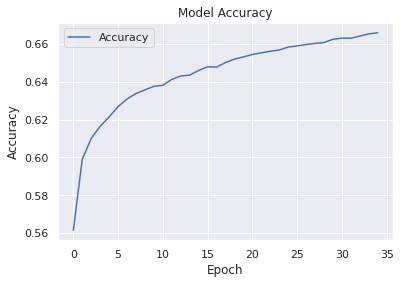

In [30]:
plt.plot(hh.history['acc'])
# plt.plot(hh.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

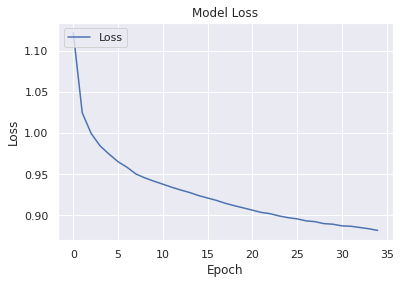

In [31]:
# plt.plot(hh.history['acc'])
plt.plot(hh.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

In [32]:
print("After saving")
print('Time: ', stop - start) 
print("Loss: ",test_loss)
print("Accuracy: ",test_accuracy)
print("F1: ",test_f1_score)
print("precision: ",test_precision)
print("recall: ",test_recall)

After saving
Time:  1675.562279193
Loss:  1.018426822090328
Accuracy:  0.6174334657610321
F1:  0.601736470848784
precision:  0.6535606446558074
recall:  0.5588448887180144
